# VGG16 Önceden Eğitilmiş Modeli ile Taş Kağıt Makas tahminleyicisi

Bu not defteri Taş Kağıt Makas oyunayan bir yapay zekanın tanımlayıcısı olmayı amaçlayan bir evrişimli sinir ağının eğitimi ve değerlendirmesini konu almaktadır.

Veri seti kaggle üzerinden elde edilmiştir.
https://www.kaggle.com/drgfreeman/rockpaperscissors

Aşağıdaki python komutu colab <-> drive bağlantısını sağlayacaktır.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Kullanacağımız python kütüphanelerini içe aktarıyoruz.

Tensorflow versiyonunu ekrana yazdırıyoruz.

In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
print(tf.__version__)

2.4.0


# Veri seti
Yukarıda belirtildiği üzere veri setini kaggle isimli kaynaktan elde ettik.
Veri setini oluşturanlar üç adet klasör içerisinde organize etmişler.
- rock 
- paper
- scissor

> veri setindeki bütün görüntüler yeşil bir fon önünde kaydedilmiştir.

In [4]:
import os
print("Veriset Klasörü: ", os.listdir('/content/drive/MyDrive/rock_paper_scissor_dataset'))


Veriset Klasörü:  ['test', 'train', 'val']


Yukarıdaki grafik Veriseti görüntülerinin dağılımını göstermektedir.

Verisetindeki büyün görüntüler klasör isimleri ile istiflenmiştir.

veriyi train ve validation için iki klasöre ayırmamız gerekiyor.
aşağıda bu iki klasör oluşturuluyor.

In [5]:
# veriyi train ve validation için iki klasöre ayırmamız gerekiyor.
# aşağıda bu iki klasör oluşturuluyor.
import shutil
base_dir = '/content/drive/MyDrive/rock_paper_scissor_dataset'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [6]:
# görüntülerin bulunduğu dizinler ilgili değişkenlere kaydediliyor.
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

# eğitim klasörü içerisinde sınıflandırma amaçlı klasör dizinleri belirleniyor
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

# doğrulama klasörü içerisinde sınıflandırma amaçlı klasör dizinleri belirleniyor
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

# doğrulama klasörü içerisinde sınıflandırma amaçlı klasör dizinleri belirleniyor
test_rock = os.path.join(test_dir, 'rock')
test_paper = os.path.join(test_dir, 'paper')
test_scissors = os.path.join(test_dir, 'scissors')




Bu işlemin sonunda artık verisetimiz eğitim ve doğrulama için iki farklı klasöre ayrılmış durumda.

In [7]:
count_trainrock = len(os.listdir('/content/drive/MyDrive/rock_paper_scissor_dataset/train/rock'))
count_trainpaper = len(os.listdir('/content/drive/MyDrive/rock_paper_scissor_dataset/train/paper'))
count_trainsci = len(os.listdir('/content/drive/MyDrive/rock_paper_scissor_dataset/train/scissors'))
print("Eğitim Taş Sayısı: ", count_trainrock)
print("Eğitim Kağıt Sayısı: ", count_trainpaper)
print("Eğitim Makas Sayısı: ", count_trainsci)

Eğitim Taş Sayısı:  500
Eğitim Kağıt Sayısı:  500
Eğitim Makas Sayısı:  499


In [8]:
count_valrock = len(os.listdir('/content/drive/MyDrive/rock_paper_scissor_dataset/val/rock'))
count_valpaper = len(os.listdir('/content/drive/MyDrive/rock_paper_scissor_dataset/val/paper'))
count_valsci = len(os.listdir('/content/drive/MyDrive/rock_paper_scissor_dataset/val/scissors'))
print("Doğrulama Taş Sayısı: ", count_valrock)
print("Doğrulama Kağıt Sayısı: ", count_valpaper)
print("Doğrulama Makas Sayısı: ", count_valsci)

Doğrulama Taş Sayısı:  150
Doğrulama Kağıt Sayısı:  150
Doğrulama Makas Sayısı:  150


In [9]:
count_testrock = len(os.listdir('/content/drive/MyDrive/rock_paper_scissor_dataset/test/rock'))
count_testpaper = len(os.listdir('/content/drive/MyDrive/rock_paper_scissor_dataset/test/paper'))
count_testsci = len(os.listdir('/content/drive/MyDrive/rock_paper_scissor_dataset/test/scissors'))
print("Test Taş Sayısı: ", count_testrock)
print("Test Kağıt Sayısı: ", count_testpaper)
print("Test Makas Sayısı: ", count_testsci)

Test Taş Sayısı:  76
Test Kağıt Sayısı:  62
Test Makas Sayısı:  100


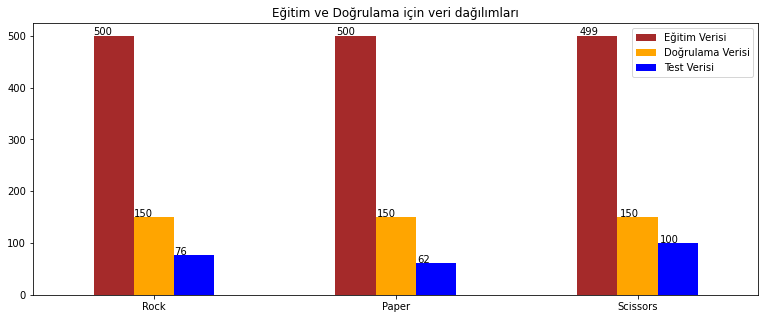

In [11]:
import pandas as pd
tr = [count_trainrock, count_trainpaper, count_trainsci]
va = [count_valrock, count_valpaper, count_valsci]
te = [count_testrock, count_testpaper, count_testsci]
index = ['Rock', 'Paper', 'Scissors']
data_am = pd.DataFrame({'Eğitim Verisi': tr, 'Doğrulama Verisi': va, 'Test Verisi': te }, index=index)
ax = data_am.plot.bar(rot=0, color=['brown', 'orange','blue'], figsize=(13,5))
ax.set_title("Eğitim ve Doğrulama için veri dağılımları")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [12]:
# ImageDataGenerator'ler tanımlanıyor.
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
validation_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [13]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=32,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150, 150), 
        batch_size=32, 
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir, 
        target_size=(150, 150), 
        batch_size=32, 
        class_mode='categorical')

Found 1499 images belonging to 3 classes.
Found 450 images belonging to 3 classes.
Found 238 images belonging to 3 classes.


In [14]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [15]:
# model katmanları belirleniyor. Önceden eğitilmiş conv_base katmanı ekleniyor.
model = tf.keras.models.Sequential([
  conv_base,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'sigmoid')
])

In [16]:
# Modelin özeti ekrana yazdırılıyor.
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 16,812,867
Trainable params: 9,177,603
Non-trainable params: 7,635,264
_________________________________________________________________
None


In [17]:
# Doğruluk(Accuracy) %97'ye ulaştığında eğitimi durduracak bir callback kullanmak.
# veriseti çok büyük olmadığı için verinin ezberlenmemesi için.
accuracythreshold = 85e-2 #eşil değeri bu satırdan değiştirilebilir.
class AccCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') >= accuracythreshold):   
          print("\nDoğruluk %2.2f%% 'ye ulaştı. Eğitim durdu!" %(accuracythreshold*100))   
          self.model.stop_training = True

In [18]:
# mmodel derleniyor
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [19]:
# Eğitim başlatılıyor ve eğitim geçmişi kaydediliyor.
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks=[AccCallback()])

Epoch 1/20
25/25 - 459s - loss: 20.0637 - accuracy: 0.4038 - val_loss: 0.9643 - val_accuracy: 0.6438
Epoch 2/20
25/25 - 248s - loss: 1.9101 - accuracy: 0.4613 - val_loss: 0.5993 - val_accuracy: 0.7125
Epoch 3/20
25/25 - 191s - loss: 0.7129 - accuracy: 0.7100 - val_loss: 0.1220 - val_accuracy: 0.9625
Epoch 4/20
25/25 - 187s - loss: 0.4056 - accuracy: 0.8855 - val_loss: 0.0656 - val_accuracy: 0.9750

Doğruluk 85.00% 'ye ulaştı. Eğitim durdu!


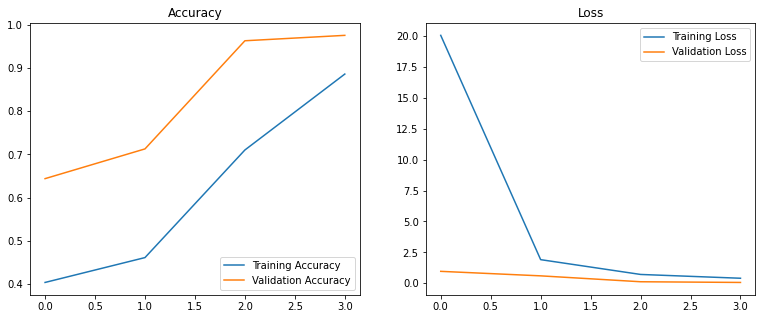

In [21]:
import matplotlib.pyplot as plt
# Doğruluk ve kayıp grafikleri görselleştiriliyor.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

Şimdi modelimiz hazır :)

Bi bakalım ona bir resim versek doğru algılayabiliyor mu?

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[1]


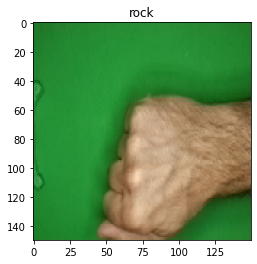

[0]


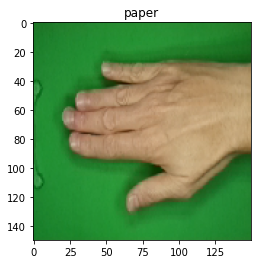

[2]


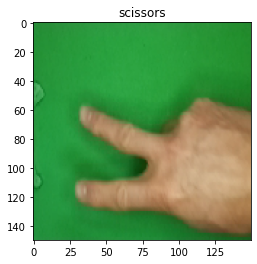

In [22]:
from keras.preprocessing import image
import numpy as np
get_label_name = ['paper','rock', 'scissors']

image_path="/content/drive/MyDrive/rock_paper_scissor_dataset/test/rock/XFCJ1H5zoEXgE5CX.png"
img = image.load_img(image_path, target_size=(150, 150))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=model.predict_classes(img)
print(result)
plt.title(get_label_name[list(result)[0]])

plt.show()

image_path="/content/drive/MyDrive/rock_paper_scissor_dataset/test/paper/QUcJ1QclQwOY50vY.png"
img = image.load_img(image_path, target_size=(150, 150))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=model.predict_classes(img)
print(result)
plt.title(get_label_name[list(result)[0]])

plt.show()

image_path="/content/drive/MyDrive/rock_paper_scissor_dataset/test/scissors/XN42vZFFWvOwwrEb.png"
img = image.load_img(image_path, target_size=(150, 150))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=model.predict_classes(img)
print(result)

plt.title(get_label_name[list(result)[0]])

plt.show()

In [23]:
actuals = []
predictions = []

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


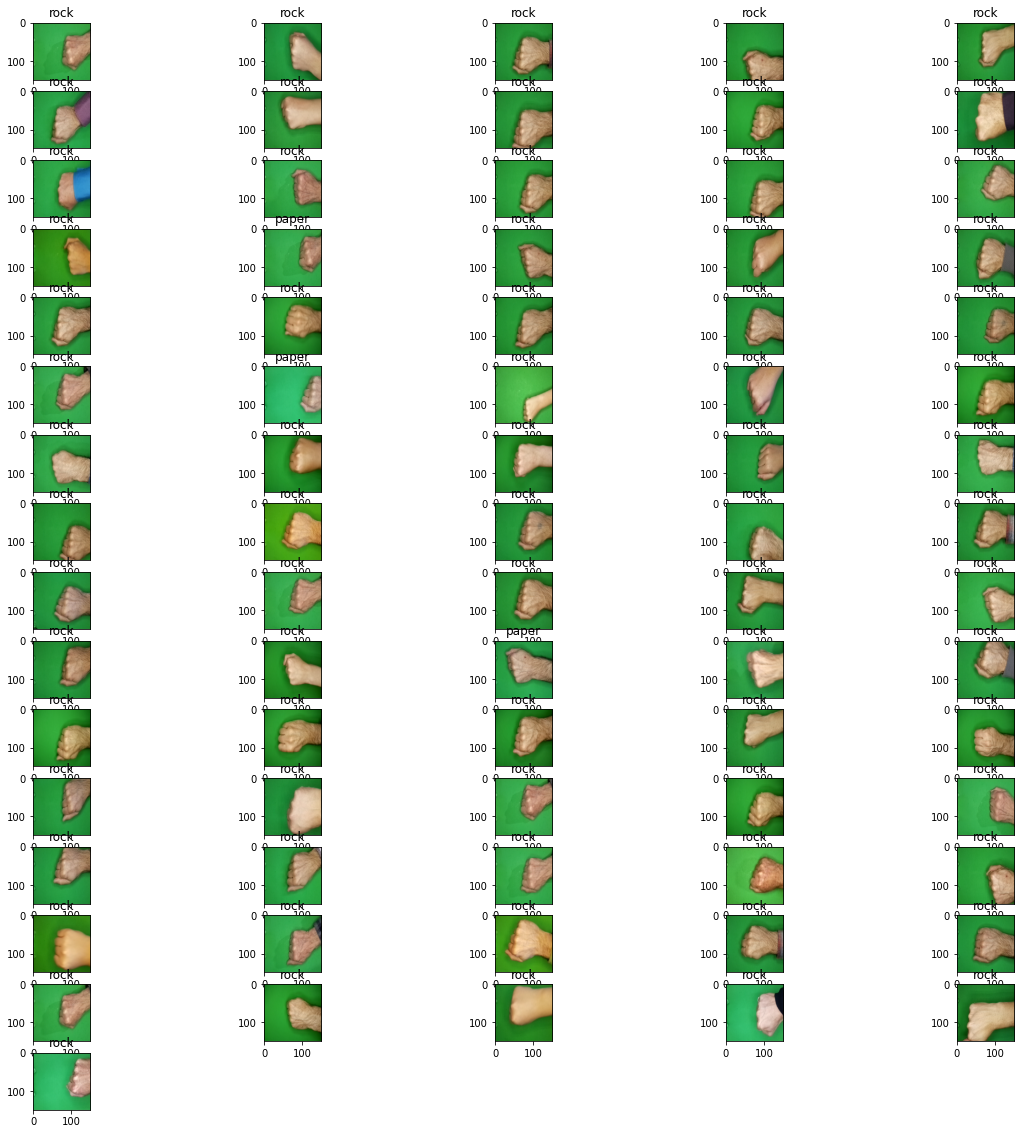

In [24]:
img_dir=test_rock
batch_holder = np.zeros((len(os.listdir(img_dir)), 150, 150, 3))

for i,img in enumerate(os.listdir(img_dir)):
  actuals.append(1)
  img = image.load_img(os.path.join(img_dir,img), target_size=(150,150))
  batch_holder[i, :] = img

result=model.predict_classes(batch_holder)
fig = plt.figure(figsize=(20, 20))

for i,img in enumerate(batch_holder):
  fig.add_subplot((len(os.listdir(img_dir))/5)+1,5, i+1)
  plt.title(get_label_name[list(result)[i]])
  predictions.append(list(result)[i])
  plt.imshow(img/256.)
  
plt.show()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


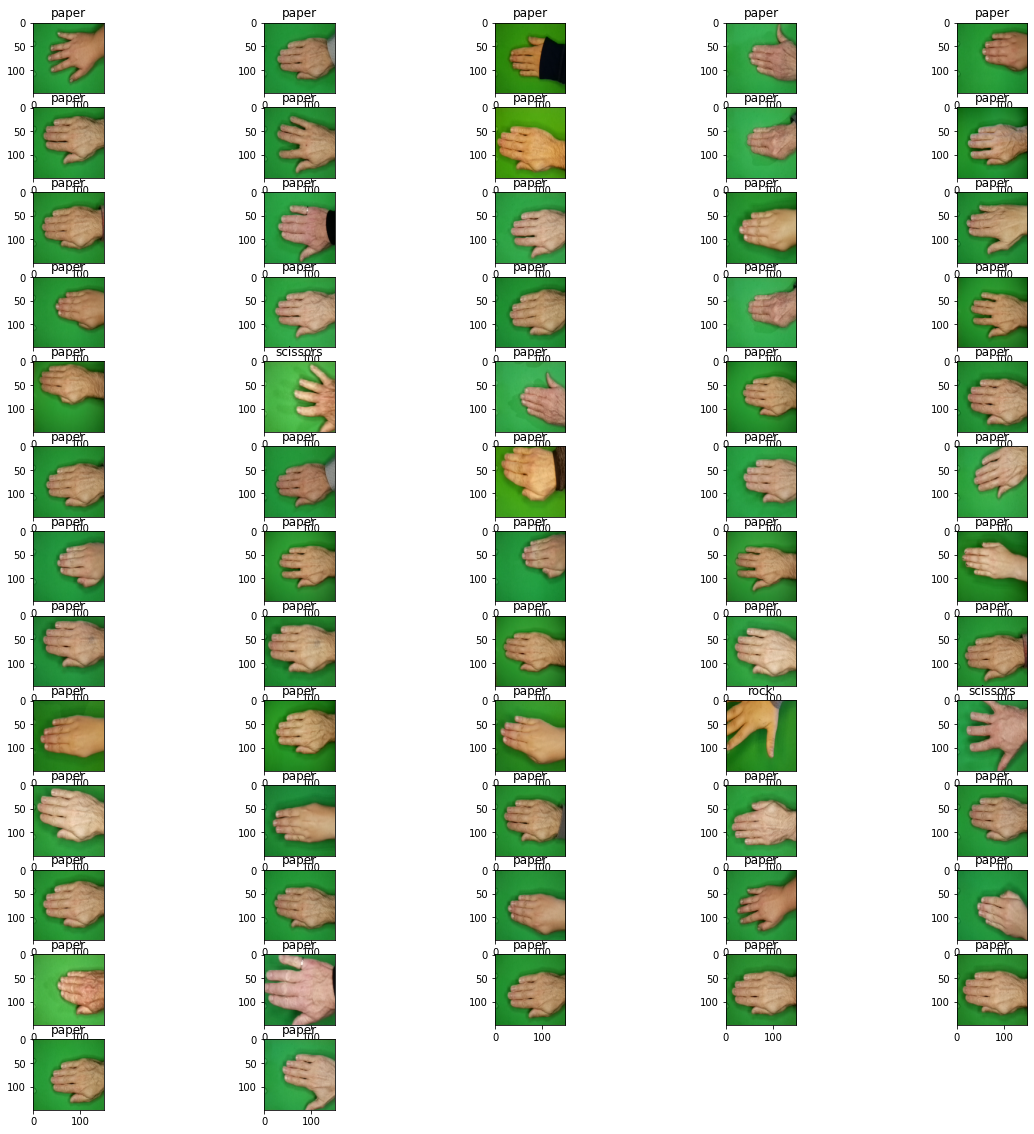

In [25]:
img_dir=test_paper
batch_holder = np.zeros((len(os.listdir(img_dir)), 150, 150, 3))

for i,img in enumerate(os.listdir(img_dir)):
  actuals.append(0)
  img = image.load_img(os.path.join(img_dir,img), target_size=(150,150))
  batch_holder[i, :] = img

result=model.predict_classes(batch_holder)

fig = plt.figure(figsize=(20, 20))

for i,img in enumerate(batch_holder):
  fig.add_subplot((len(os.listdir(img_dir))/5)+1,5, i+1)
  plt.title(get_label_name[list(result)[i]])
  predictions.append(list(result)[i])
  plt.imshow(img/256.)
  
plt.show()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


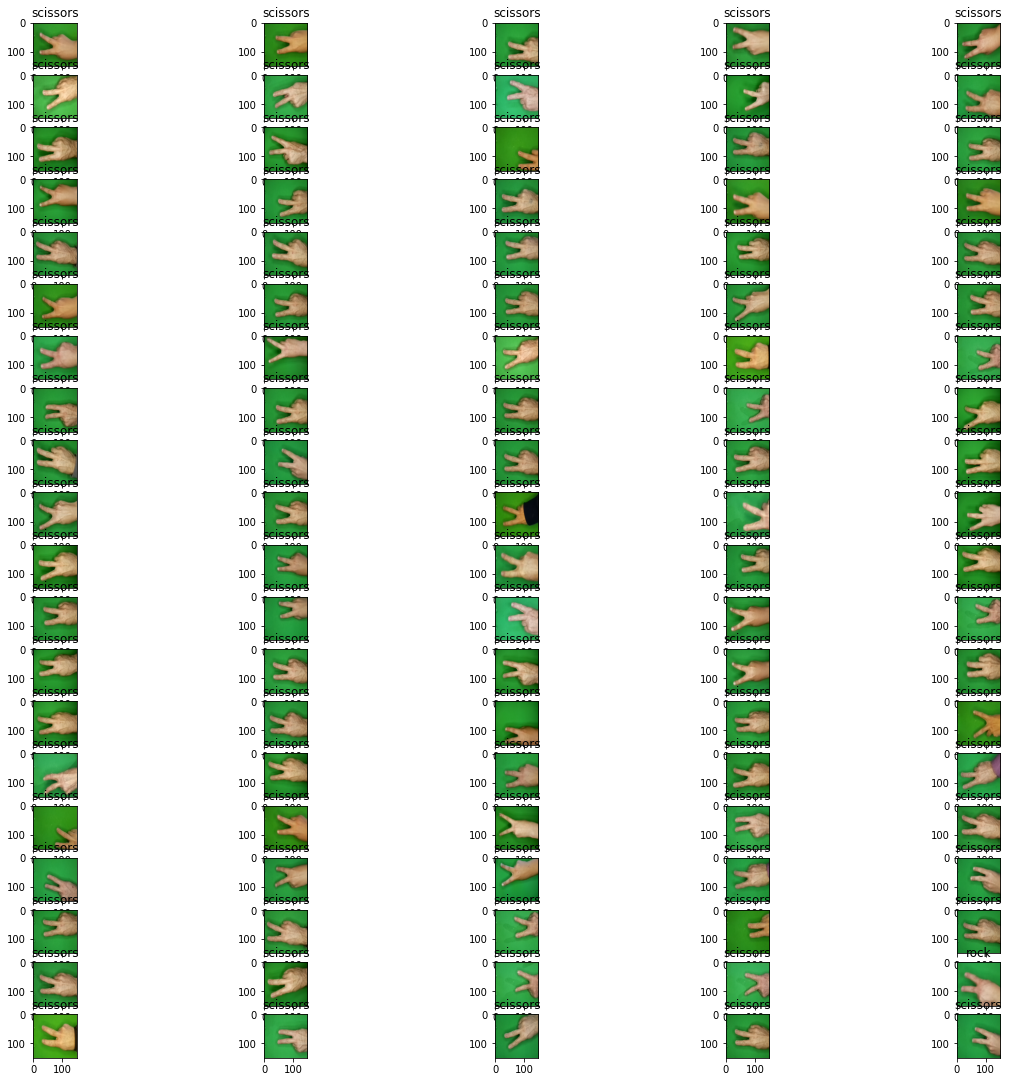

In [26]:
img_dir=test_scissors
batch_holder = np.zeros((len(os.listdir(img_dir)), 150, 150, 3))

for i,img in enumerate(os.listdir(img_dir)):
  actuals.append(2)
  img = image.load_img(os.path.join(img_dir,img), target_size=(150,150))
  batch_holder[i, :] = img

result=model.predict_classes(batch_holder)

fig = plt.figure(figsize=(20, 20))

for i,img in enumerate(batch_holder):
  fig.add_subplot((len(os.listdir(img_dir))/5)+1,5, i+1)
  plt.title(get_label_name[list(result)[i]])
  predictions.append(list(result)[i])
  plt.imshow(img/256.)
  
plt.show()

In [27]:
print(actuals)
print(predictions)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Aşağıdaki matriste dikey eksen asıl değerleri ifade eder.
Yatay eksen ise tahmin edilen değerleri ifade eder.
```
0: Paper
1: Rock
2: Scissor
```

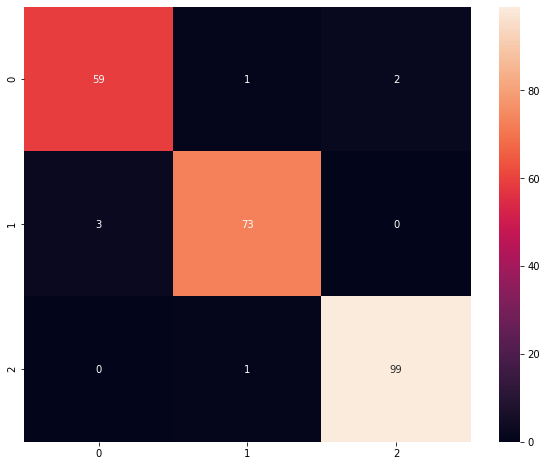

In [28]:
# Creating the confusion matrix graphs
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
cf_train_matrix = confusion_matrix(actuals, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(cf_train_matrix, annot=True, fmt='d')